<a href="https://colab.research.google.com/github/hakimalikhsan/TugasAkhir/blob/main/KowalskyBSO13ab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lsq-ellipse

In [ ]:
import pandas as pd
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [ ]:
from ellipse import LsqEllipse

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/TA_Hakim/Bso13ab.xlsx')

In [ ]:
time = data['time']
rho = data['rho']
theta = data['theta']
theta_corr = []

In [ ]:
!pip install astropy

In [ ]:
from astropy.coordinates import SkyCoord
# koordinat
bso13ab = SkyCoord(ra='17h19m03.85s', dec='-46d38m10.1s', frame='icrs')
ra = bso13ab.ra.radian
dec = bso13ab.dec.radian
print(ra, dec)

4.533772711956111 -0.813954174028481


In [ ]:
for i in range(len(theta)):
  theta_corr.append(theta[i] + 0.00557*np.sin(ra)*(1/np.cos(dec))*(2000-time[i]))

In [ ]:
x = []
y = []
for i in range(len(theta)):
    x.append(rho[i]*np.cos(np.deg2rad(theta_corr[i])))
    y.append(rho[i]*np.sin(np.deg2rad(theta_corr[i])))
x = np.array(x)
y = np.array(y)

In [ ]:
theta_corr = np.array(theta_corr)

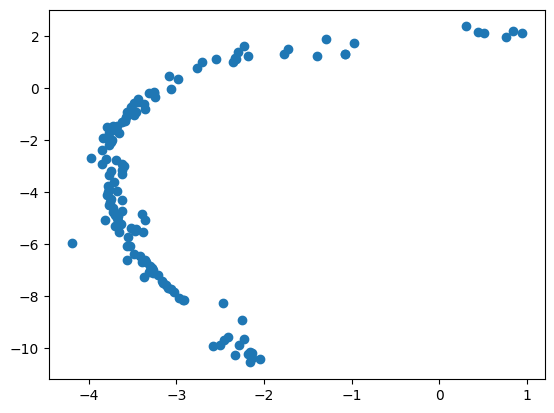

In [ ]:
plt.scatter(x,y)

In [ ]:
X = np.array(list(zip(x,y)))

In [ ]:
reg = LsqEllipse().fit(X)

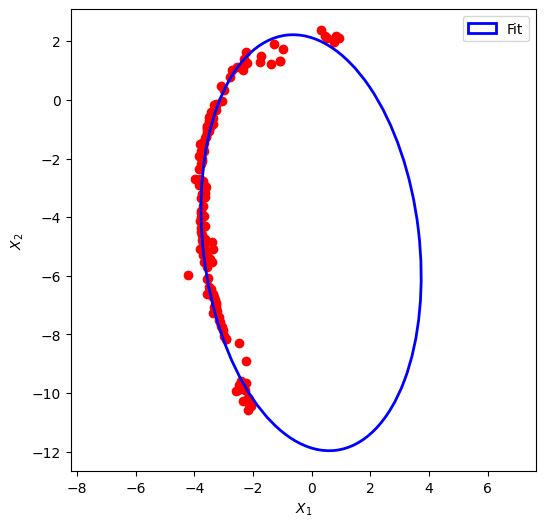

In [ ]:
center, width, height, phi = reg.as_parameters()
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
ax.axis('equal')
ax.plot(x, y, 'ro', zorder=1)
ellipse = Ellipse(
    xy=center, width=2*width, height=2*height, angle=np.rad2deg(phi),
    edgecolor='b', fc='None', lw=2, label='Fit', zorder=2
)
ax.add_patch(ellipse)

plt.xlabel('$X_1$')
plt.ylabel('$X_2$')

plt.legend()
plt.show()

In [ ]:
a, b, c, d, e, f = reg.coefficients

In [ ]:
#  Ax2 +2Hxy +By2 +2Gx +2Fy +1=0
A = a/f
H = b/(2*f)
B = c/f
G = d/(2*f)
F = e/f

In [ ]:
# Ascending node (pakai referensi acuan (si puzzle))
tan2Omega = (2*(H-F*G))/(G**2-F**2+B-A)
Omega2 = np.arctan(tan2Omega)
Omega = Omega2/2
if Omega < 0:
    Omega += 2 * np.pi
Omegad = np.rad2deg(Omega)
print(f'Omega = {Omegad}')

Omega = 29.326065126652054


In [ ]:
# incl
tansqipsq = (2*(H-F*G))/(np.sin(Omega2))
psq = 2/(F**2+G**2+A+B-tansqipsq)
p = np.sqrt(psq)
tani = tansqipsq * psq
i = np.arctan(tani)
if i < 0:
    i+= 2*np.pi
id = np.rad2deg(i)
print(f'i = {id}')

i = 288.7419036206876


In [ ]:
360 - id

np.float64(71.2580963793124)

In [ ]:
# Quadratic part of design matrix [eqn. 15] from (*)
D1 = np.vstack([x**2, x*y, y**2]).T
# Linear part of design matrix [eqn. 16] from (*)
D2 = np.vstack([x, y, np.ones_like(x)]).T

# Forming scatter matrix [eqn. 17] from (*)
S1 = D1.T @ D1
S2 = D1.T @ D2
S3 = D2.T @ D2

# Constraint matrix [eqn. 18]
C1 = np.array([[0., 0., 2.], [0., -1., 0.], [2., 0., 0.]])

# Reduced scatter matrix [eqn. 29]
M = la.inv(C1) @ (S1 - S2 @ la.inv(S3) @ S2.T)

# M*|a b c >=l|a b c >. Find eigenvalues and eigenvectors from this
# equation [eqn. 28]
eigval, eigvec = np.linalg.eig(M)

# Eigenvector must meet constraint 4ac - b^2 to be valid.
cond = 4*np.multiply(eigvec[0, :], eigvec[2, :]) - np.power(eigvec[1, :], 2)
a1 = eigvec[:, np.nonzero(cond > 0)[0]]

# |d f g> = -S3^(-1) * S2^(T)*|a b c> [eqn. 24]
a2 = la.inv(-S3) @ S2.T @ a1

In [ ]:
print("\n--- Perhitungan Error Fitting ---")

# Langkah 1: Ekstrak koefisien A, B, C, D, E, F
A, B, C = a1.flatten()
D, E, F = a2.flatten()

# Langkah 2: Hitung jarak aljabar untuk semua titik (x,y)
# Persamaan: Ax^2 + Bxy + Cy^2 + Dx + Ey + F
algebraic_distances = A*x**2 + B*x*y + C*y**2 + D*x + E*y + F

# Langkah 3: Hitung metrik error agregat
# Sum of Squared Errors (SSE)
sse = np.sum(algebraic_distances**2)
print(f"Sum of Squared Errors (SSE): {sse:.4f}")

# Mean Squared Error (MSE)
mse = np.mean(algebraic_distances**2)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

print("\nInterpretasi: Semakin kecil nilai RMSE, semakin baik hasil fittingnya.")


--- Perhitungan Error Fitting ---
Sum of Squared Errors (SSE): 155.0125
Mean Squared Error (MSE): 1.1482
Root Mean Squared Error (RMSE): 1.0716

Interpretasi: Semakin kecil nilai RMSE, semakin baik hasil fittingnya.


SOLUSI OPTIMAL DITEMUKAN
Koefisien elips yang ditemukan:
 A=0.844, B=0.008, C=0.156, D=1.581, E=1.264, F=-3.421

METRIK EVALUASI:
Rata-rata Kuadrat Jarak Aljabar: 0.714600
(Semakin mendekati nol, semakin baik fitting-nya)



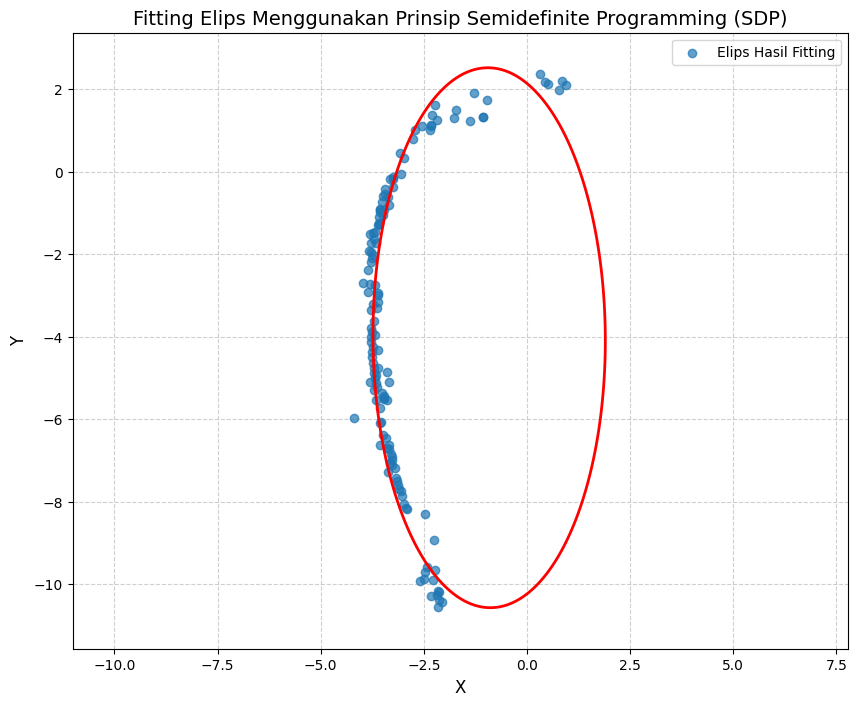

In [ ]:
import cvxpy as cp
# --- 2. Setup Masalah Optimisasi SDP ---
# Tujuan: Menemukan koefisien [A, B, C, D, E, F] dari persamaan:
# Ax^2 + Bxy + Cy^2 + Dx + Ey + F = 0

# Definisikan variabel yang akan dicari oleh CVXPY
# a_vars adalah vektor [A, B, C, D, E, F]
a_vars = cp.Variable(6)

# Pisahkan variabel untuk kejelasan
A, B, C, D, E, F = a_vars[0], a_vars[1], a_vars[2], a_vars[3], a_vars[4], a_vars[5]

# Bangun matriks desain (data matrix)
# Setiap baris adalah [x^2, xy, y^2, x, y, 1]
D_matrix = np.vstack([
    x**2,
    x * y,
    y**2,
    x,
    y,
    np.ones_like(x)
]).T

# --- 3. Definisikan Fungsi Objektif dan Kendala ---

# FUNGSI OBJEKTIF: Minimalkan Kesalahan Fitting (Jumlah Kuadrat Jarak Aljabar)
objective = cp.Minimize(cp.sum_squares(D_matrix @ a_vars))

# KENDALA (CONSTRAINTS):
constraints = []

# KENDALA 1: Syarat "Harus Elips" (Inti dari SDP)
# Matriks bagian kuadratik Q = [[A, B/2], [B/2, C]] harus definit positif.
Q = cp.vstack([
    cp.hstack([A, B/2]),
    cp.hstack([B/2, C])
])
# '>>' berarti definit positif. Kita beri sedikit toleransi agar numerik stabil.
constraints.append(Q >> 1e-8 * np.eye(2))

# KENDALA 2: Menghindari Solusi Trivial (Normalisasi)
# Gunakan kendala linear konveks, contoh: A + C = 1.
constraints.append(A + C == 1)

# --- 4. Selesaikan Masalah SDP ---
# Gabungkan objektif dan kendala ke dalam sebuah masalah
problem = cp.Problem(objective, constraints)

# Selesaikan masalahnya! Coba dengan solver SCS jika default gagal.
try:
    problem.solve(solver=cp.SCS)
except cp.error.SolverError:
    print("Solver default gagal, mencoba solver lain...")
    problem.solve(solver=cp.SCS)


# --- 5. Tampilkan dan Evaluasi Hasil ---
if problem.status in ["optimal", "optimal_inaccurate"]:
    print("="*40)
    print("SOLUSI OPTIMAL DITEMUKAN")
    print("="*40)

    # Ambil nilai koefisien yang ditemukan
    A_fit, B_fit, C_fit, D_fit, E_fit, F_fit = a_vars.value

    print(f"Koefisien elips yang ditemukan:\n A={A_fit:.3f}, B={B_fit:.3f}, C={C_fit:.3f}, D={D_fit:.3f}, E={E_fit:.3f}, F={F_fit:.3f}\n")

    # --- Evaluasi Kualitas Fitting (Alternatif R² score) ---
    # Hitung vektor jarak aljabar untuk semua titik
    algebraic_distances = D_matrix @ a_vars.value
    # Hitung rata-rata kuadrat kesalahan (Mean Squared Error)
    mse_algebraic = np.mean(algebraic_distances**2)
    print(f"METRIK EVALUASI:")
    print(f"Rata-rata Kuadrat Jarak Aljabar: {mse_algebraic:.6f}")
    print("(Semakin mendekati nol, semakin baik fitting-nya)\n")

    # --- Visualisasikan hasil ---
    # Buat grid untuk menggambar kurva elips
    x_range = np.linspace(x.min() - 1, x.max() + 1, 300)
    y_range = np.linspace(y.min() - 1, y.max() + 1, 300)
    X_grid, Y_grid = np.meshgrid(x_range, y_range)

    # Hitung nilai persamaan elips di setiap titik grid
    equation = A_fit*X_grid**2 + B_fit*X_grid*Y_grid + C_fit*Y_grid**2 + D_fit*X_grid + E_fit*Y_grid + F_fit

    plt.figure(figsize=(10, 8))
    # Gambar titik data asli
    plt.scatter(x, y, label='Titik Data (dengan noise)', alpha=0.7, zorder=2)
    # Gambar kontur elips yang ditemukan (level = 0)
    plt.contour(X_grid, Y_grid, equation, levels=[0], colors='red', linewidths=2)

    plt.title('Fitting Elips Menggunakan Prinsip Semidefinite Programming (SDP)', fontsize=14)
    plt.xlabel('X', fontsize=12)
    plt.ylabel('Y', fontsize=12)
    plt.legend(['Elips Hasil Fitting', 'Titik Data'])
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axis('equal')
    plt.show()

else:
    print("="*40)
    print("GAGAL MENEMUKAN SOLUSI OPTIMAL")
    print(f"Status Penyelesaian: {problem.status}")
    print("="*40)


In [ ]:
A = A_fit/F_fit
H = B_fit/(2*F_fit)
B = C_fit/F_fit
G = D_fit/(2*F_fit)
F = E_fit/F_fit

In [ ]:
print(f'A = {A}')
print(f'H = {H}')
print(f'B = {B}')
print(f'G = {G}')
print(f'F = {F}')

A = -0.24665796827199737
H = -0.001130912376364439
B = -0.04567932910460946
G = -0.23111566298248767
F = -0.3696016530291949


In [ ]:
x

array([ 0.95035395,  0.76640931,  0.84571069,  0.50835488,  0.44360019,
        0.30693562, -0.9778136 , -1.29541781, -1.07643328, -1.07643328,
       -1.72836935, -1.39096225, -1.76746759, -2.23041816, -2.18715376,
       -2.29281635, -2.32639382, -2.32529383, -2.54425267, -2.35359249,
       -2.71123673, -2.76912898, -3.08626303, -2.98178087, -3.31517074,
       -3.25715013, -3.05970375, -3.25551921, -3.25017729, -3.4341121 ,
       -3.37451447, -3.43884619, -3.49020698, -3.51375813, -3.56697965,
       -3.35413804, -3.460526  , -3.55398835, -3.55673415, -3.48559832,
       -3.57969642, -3.59013145, -3.62175444, -3.58948554, -3.72921088,
       -3.79831009, -3.68264302, -3.69989138, -3.77075996, -3.65892588,
       -3.83956099, -3.77682071, -3.74201673, -3.74841515, -3.7716815 ,
       -3.84908855, -3.80006228, -3.97273027, -3.68591727, -3.84663557,
       -3.61809291, -3.60225719, -3.74273452, -3.62056049, -3.77165708,
       -3.62523232, -3.71372462, -3.78206128, -3.76943559, -3.78

In [ ]:
y

array([  2.10545182,   1.97661751,   2.19254953,   2.11989984,
         2.16502168,   2.37020896,   1.74467205,   1.90049802,
         1.31578547,   1.31578547,   1.48699004,   1.23483765,
         1.2931196 ,   1.62567981,   1.25170221,   1.38758538,
         1.13841636,   1.11776948,   1.12034742,   1.00707616,
         1.0006475 ,   0.79140676,   0.45758113,   0.33012551,
        -0.17900557,  -0.13628291,  -0.04257907,  -0.17086442,
        -0.3595102 ,  -0.42246192,  -0.61445267,  -0.53360745,
        -0.59165464,  -0.73593735,  -0.90501721,  -0.80762492,
        -0.91714764,  -0.9154599 ,  -0.98272182,  -1.04890626,
        -1.10715065,  -1.27556113,  -1.29109248,  -1.24723435,
        -1.47413915,  -1.51688512,  -1.45593282,  -1.62246841,
        -1.73316744,  -1.73630683,  -1.91360169,  -1.94887796,
        -2.01489721,  -2.08650038,  -2.18723996,  -2.36958168,
        -2.7144846 ,  -2.69395883,  -2.75209264,  -2.90444398,
        -2.93683566,  -2.98766517,  -3.19348372,  -3.16

In [ ]:
Omega2 = np.arctan(2*(H-F*G)/(G**2-F**2+B-A))
Omega = Omega2/2
if Omega < 0:
    Omega += np.pi

Omegad= np.degrees(Omega)
print(f'Omega = {Omegad}')

Omega = 152.11661652252437


In [ ]:
tansqipsq = (2*(H-F*G))/(np.sin(Omega2))
psq = 2/(F**2+G**2+A+B-tansqipsq)
p = np.sqrt(psq)
tani = tansqipsq * psq
i = np.arctan(tani)
if i < 0:
    i+=np.pi
id = np.rad2deg(i)
print(f'i = {id}')

i = 126.66171059622296


/tmp/ipython-input-29-640175946.py:3: RuntimeWarning: invalid value encountered in sqrt
  p = np.sqrt(psq)


In [ ]:
psq

np.float64(-6.416541760012663)

In [ ]:
x_crop = x[6:]
y_crop = y[6:]

SOLUSI OPTIMAL DITEMUKAN
Koefisien elips yang ditemukan:
 A=0.951, B=-0.008, C=0.049, D=4.387, E=0.342, F=3.974

METRIK EVALUASI:
Rata-rata Kuadrat Jarak Aljabar: 0.174054
(Semakin mendekati nol, semakin baik fitting-nya)



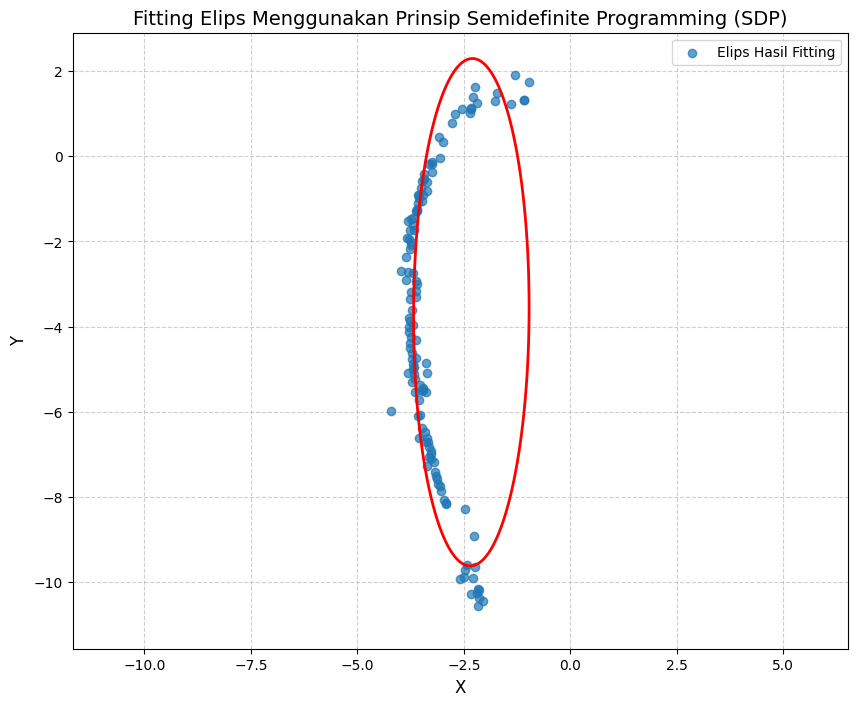

In [ ]:
import cvxpy as cp
# --- 2. Setup Masalah Optimisasi SDP ---
# Tujuan: Menemukan koefisien [A, B, C, D, E, F] dari persamaan:
# Ax^2 + Bxy + Cy^2 + Dx + Ey + F = 0

# Definisikan variabel yang akan dicari oleh CVXPY
# a_vars adalah vektor [A, B, C, D, E, F]
a_vars = cp.Variable(6)

# Pisahkan variabel untuk kejelasan
A, B, C, D, E, F = a_vars[0], a_vars[1], a_vars[2], a_vars[3], a_vars[4], a_vars[5]

# Bangun matriks desain (data matrix)
# Setiap baris adalah [x^2, xy, y^2, x, y, 1]
D_matrix = np.vstack([
    x_crop**2,
    x_crop * y_crop,
    y_crop**2,
    x_crop,
    y_crop,
    np.ones_like(x_crop)
]).T

# --- 3. Definisikan Fungsi Objektif dan Kendala ---

# FUNGSI OBJEKTIF: Minimalkan Kesalahan Fitting (Jumlah Kuadrat Jarak Aljabar)
objective = cp.Minimize(cp.sum_squares(D_matrix @ a_vars))

# KENDALA (CONSTRAINTS):
constraints = []

# KENDALA 1: Syarat "Harus Elips" (Inti dari SDP)
# Matriks bagian kuadratik Q = [[A, B/2], [B/2, C]] harus definit positif.
Q = cp.vstack([
    cp.hstack([A, B/2]),
    cp.hstack([B/2, C])
])
# '>>' berarti definit positif. Kita beri sedikit toleransi agar numerik stabil.
constraints.append(Q >> 1e-8 * np.eye(2))

# KENDALA 2: Menghindari Solusi Trivial (Normalisasi)
# Gunakan kendala linear konveks, contoh: A + C = 1.
constraints.append(A + C == 1)

# --- 4. Selesaikan Masalah SDP ---
# Gabungkan objektif dan kendala ke dalam sebuah masalah
problem = cp.Problem(objective, constraints)

# Selesaikan masalahnya! Coba dengan solver SCS jika default gagal.
try:
    problem.solve(solver=cp.SCS)
except cp.error.SolverError:
    print("Solver default gagal, mencoba solver lain...")
    problem.solve(solver=cp.SCS)


# --- 5. Tampilkan dan Evaluasi Hasil ---
if problem.status in ["optimal", "optimal_inaccurate"]:
    print("="*40)
    print("SOLUSI OPTIMAL DITEMUKAN")
    print("="*40)

    # Ambil nilai koefisien yang ditemukan
    A_fit, B_fit, C_fit, D_fit, E_fit, F_fit = a_vars.value

    print(f"Koefisien elips yang ditemukan:\n A={A_fit:.3f}, B={B_fit:.3f}, C={C_fit:.3f}, D={D_fit:.3f}, E={E_fit:.3f}, F={F_fit:.3f}\n")

    # --- Evaluasi Kualitas Fitting (Alternatif R² score) ---
    # Hitung vektor jarak aljabar untuk semua titik
    algebraic_distances = D_matrix @ a_vars.value
    # Hitung rata-rata kuadrat kesalahan (Mean Squared Error)
    mse_algebraic = np.mean(algebraic_distances**2)
    print(f"METRIK EVALUASI:")
    print(f"Rata-rata Kuadrat Jarak Aljabar: {mse_algebraic:.6f}")
    print("(Semakin mendekati nol, semakin baik fitting-nya)\n")

    # --- Visualisasikan hasil ---
    # Buat grid untuk menggambar kurva elips
    x_range = np.linspace(x_crop.min() - 1, x_crop.max() + 1, 300)
    y_range = np.linspace(y_crop.min() - 1, y_crop.max() + 1, 300)
    X_grid, Y_grid = np.meshgrid(x_range, y_range)

    # Hitung nilai persamaan elips di setiap titik grid
    equation = A_fit*X_grid**2 + B_fit*X_grid*Y_grid + C_fit*Y_grid**2 + D_fit*X_grid + E_fit*Y_grid + F_fit

    plt.figure(figsize=(10, 8))
    # Gambar titik data asli
    plt.scatter(x_crop, y_crop, label='Titik Data (dengan noise)', alpha=0.7, zorder=2)
    # Gambar kontur elips yang ditemukan (level = 0)
    plt.contour(X_grid, Y_grid, equation, levels=[0], colors='red', linewidths=2)

    plt.title('Fitting Elips Menggunakan Prinsip Semidefinite Programming (SDP)', fontsize=14)
    plt.xlabel('X', fontsize=12)
    plt.ylabel('Y', fontsize=12)
    plt.legend(['Elips Hasil Fitting', 'Titik Data'])
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axis('equal')
    plt.show()

else:
    print("="*40)
    print("GAGAL MENEMUKAN SOLUSI OPTIMAL")
    print(f"Status Penyelesaian: {problem.status}")
    print("="*40)


In [ ]:
A = A_fit/F_fit
H = B_fit/(2*F_fit)
B = C_fit/F_fit
G = D_fit/(2*F_fit)
F = E_fit/F_fit

In [ ]:
Omega2 = np.arctan(2*(H-F*G)/(G**2-F**2+B-A))
Omega = Omega2/2
if Omega < 0:
    Omega += np.pi

Omegad= np.degrees(Omega)
print(f'Omega = {Omegad}')

Omega = 152.97848102564058


In [ ]:
tansqipsq = (2*(H-F*G))/(np.sin(Omega2))
psq = 2/(F**2+G**2+A+B-tansqipsq)
p = np.sqrt(psq)
tani = tansqipsq * psq
i = np.arctan(tani)
if i < 0:
    i+=np.pi
id = np.rad2deg(i)
print(f'i = {id}')

i = 28.401747300071236


In [ ]:
tanw = (((F*np.cos(Omega))-(G*np.sin(Omega)))*np.cos(i))/((F*np.sin(Omega))+(G*np.cos(Omega)))
w = np.arctan(tanw)
if w < 0:
    w += 2*np.pi
wd = np.rad2deg(w)
print(f'w = {wd}')

w = 32.479283451864774


In [ ]:
w

np.float64(0.5668704349235495)

In [ ]:
360-wd

np.float64(327.5207165481352)

In [ ]:
# p
tan2i_p2_2_p2 = F**2 - G**2 - A - B
tan2i_p2 = (F**2 - G**2 + A - B)/np.cos(Omega2)
dua_p2 = -tan2i_p2-tan2i_p2_2_p2
p2 = 2/dua_p2
p = np.sqrt(dua_p2)
print(f'p = {p}')

p = 0.8178850658210086


In [ ]:
e = p*(-F*np.sin(Omega)-G*np.cos(Omega))/np.cos(w)
e

np.float64(0.4388232437105263)

In [ ]:
a = p/(1-e**2)
a

np.float64(1.0129433525967602)

In [ ]:
#true anomaly
def true_anom(omega, theta, Omega, i):
  tanvw = np.tan(theta-Omega)/np.cos(i)
  vw = np.arctan(tanvw)
  v = vw - omega
  return v  #dalam radian
#eccentric anomaly
def ecc_anom(v,e):
  tanE_2 = np.sqrt((1-e)/(1+e)) * np.tan(v/2)
  E_2 = np.arctan(tanE_2)
  E = 2 * E_2
  return E # dalam radian
#Mean anomaly
def mean_anom(E, e):
  return E - e * np.sin(E)

In [ ]:
Ma = []
for i in range(len(time)):
  Ma.append(mean_anom(ecc_anom(true_anom(w, theta[i], Omega, i), e), e))
Ma = np.array(Ma)

In [ ]:
Ma

array([ 0.15406074,  0.23393093, -1.00761941,  0.07263577, -0.94336705,
       -1.03916777,  0.195263  , -0.3079395 ,  0.38464032,  0.35089148,
        0.14859874,  0.39074627, -0.01324236,  0.0126204 ,  0.29799015,
        0.13950205, -0.83536921, -1.25173867, -0.0490593 ,  0.11718402,
        0.18418185,  0.33078422, -0.1613441 ,  0.28884667, -1.06785853,
        0.25602732, -0.42242297,  0.35116653,  0.20723075, -0.00841831,
       -0.75998828,  0.31055479, -0.75428812, -1.25864891, -0.45415205,
       -0.11998922, -1.18479375,  0.09142604, -1.12746565, -0.42765143,
       -0.37793188, -0.02498121,  0.10147725, -0.83417146,  0.36271659,
       -1.17653543, -1.23198563, -0.40762972, -1.18514699, -1.03701091,
       -0.15574248,  0.1780138 ,  0.36300284, -0.04191246, -0.51276863,
       -1.24897592, -0.34903063,  0.3384383 ,  0.34778365, -0.95078041,
       -0.23001602, -0.92205179,  0.35650355, -0.7107244 , -0.66840011,
       -0.28931622,  0.20127561, -0.00826371,  0.09667447,  0.28

In [ ]:
len(Ma)==len(time)

True

In [ ]:
!pip install scipy

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
time

,time
0,1900.620
1,1900.640
2,1900.710
3,1901.670
4,1902.380
...,...
130,2016.000
131,2016.335
132,2016.667
133,2017.800


In [ ]:
time_fit = np.array(time).reshape(-1,1)

In [ ]:
model = LinearRegression()
model.fit(time_fit, Ma)

LinearRegression()

In [ ]:
slope = model.coef_[0]
slope

np.float64(0.0004962505456303089)

In [ ]:
P = 2*np.pi/slope
P

np.float64(12661.316672607474)

In [ ]:
intercept = model.intercept_
intercept

np.float64(-1.2095937773776104)

In [ ]:
T = -intercept/slope
T

np.float64(2437.465889012281)

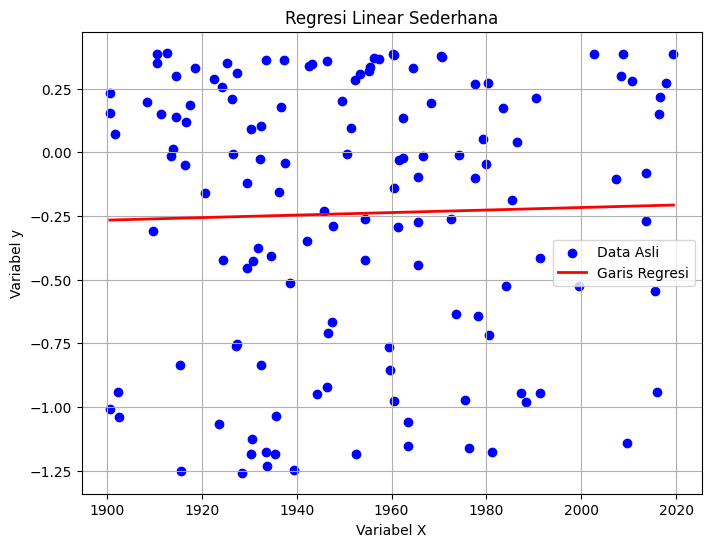

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(time_fit, Ma, color='blue', label='Data Asli') # Tampilkan data asli (titik-titik)
plt.plot(time_fit, model.predict(time_fit), color='red', linewidth=2, label='Garis Regresi') # Gambar garis hasil regresi

plt.title('Regresi Linear Sederhana')
plt.xlabel('Variabel X')
plt.ylabel('Variabel y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
tansqi_psq = (F**2 - G**2 - A + B)/np.cos(Omega2)
psq_ = 2/(F**2 + G**2 + A + B - tansqipsq)

In [ ]:
pp = np.sqrt(psq_)

In [ ]:
ii = np.arctan2(np.sqrt(tansqi_psq*psq_),1)


/tmp/ipython-input-58-34090120.py:1: RuntimeWarning: invalid value encountered in sqrt
  ii = np.arctan2(np.sqrt(tansqi_psq*psq_),1)


In [ ]:
ii

np.float64(nan)

In [ ]:
model.score(time_fit, Ma)

0.0008537378616930713

MCMC

In [ ]:
!pip install emcee
!pip install corner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 372.3 kB/s eta 0:00:00


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import emcee
# import corner
# from tqdm.auto import tqdm

# # --------- MODEL ---------
# def ellipse_equation(params, x, y):
#     a, h, b, g, f = params
#     return a*x**2 + 2*h*x*y + b*y**2 + 2*g*x + 2*f*y + 1

# def log_likelihood(params, x, y):
#     residuals = ellipse_equation(params, x, y)
#     chi2 = np.sum(residuals**2)
#     return -0.5 * chi2 / len(x)

# def log_prior(params):
#     if np.all((-10 < params) & (params < 10)):
#         return 0.0
#     return -np.inf

# def log_probability(params, x, y):
#     lp = log_prior(params)
#     if not np.isfinite(lp):
#         return -np.inf
#     return lp + log_likelihood(params, x, y)

# # --------- INISIALISASI DATA & SAMPLER ---------
# initial = np.array([-0.1325, -0.0256, -0.0930, 0.0440, -0.2022])
# ndim = len(initial)
# nwalkers = 32
# nsteps = 100000
# pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

# # Asumsikan kamu sudah punya data x dan y
# # (jika belum, generate dummy data untuk testing)
# # try:
# #     x, y
# # except NameError:
# #     theta = np.linspace(0, 2*np.pi, 100)
# #     x = 1.5 + 5*np.cos(theta)*np.cos(np.radians(30)) - 3*np.sin(theta)*np.sin(np.radians(30))
# #     y = 2.0 + 5*np.cos(theta)*np.sin(np.radians(30)) + 3*np.sin(theta)*np.cos(np.radians(30))
# #     x += np.random.normal(0, 0.2, x.shape)
# #     y += np.random.normal(0, 0.2, y.shape)

# sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y))

# # --------- JALANKAN MCMC ---------
# print("Running MCMC...")
# with tqdm(total=nsteps) as pbar:
#     for sample in sampler.sample(pos, iterations=nsteps, progress=False):
#         pbar.update()

# samples = sampler.get_chain(discard=1000, thin=20, flat=True)
# labels = ['a', 'h', 'b', 'g', 'f']

# # --------- TRACE PLOT ---------
# fig, axs = plt.subplots(ndim, 1, figsize=(10, 8), sharex=True)
# for i in range(ndim):
#     axs[i].plot(sampler.chain[:, :, i].T, alpha=0.5)
#     axs[i].set_ylabel(labels[i])
# axs[-1].set_xlabel("Step")
# plt.tight_layout()
# plt.show()

# # --------- CORNER PLOT DENGAN ± ---------
# fig = corner.corner(samples, labels=labels, show_titles=False)

# axes = np.array(fig.axes).reshape((ndim, ndim))

# for i in range(ndim):
#     ax = axes[i, i]
#     q16, q50, q84 = np.percentile(samples[:, i], [16, 50, 84])
#     median = q50
#     err_minus = median - q16
#     err_plus = q84 - median
#     std_like = 0.5 * (err_minus + err_plus)
#     title = f"{labels[i]} = {median:.5f} ± {std_like:.5f}"
#     ax.set_title(title, fontsize=10)

# plt.tight_layout()
# plt.show()

# # --------- CETAK NILAI MEAN ± STD ---------
# means = np.mean(samples, axis=0)
# stds = np.std(samples, axis=0)

# print("\nKoefisien elips hasil fit (mean ± std):")
# for name, mean, std in zip(labels, means, stds):
#     print(f"{name} = {mean:.5f} ± {std:.5f}")


Least Square

In [ ]:
from numpy.linalg import eig, inv, svd
from math import atan2
import numpy as np
def __fit_ellipse(x, y):
  x, y = x[:, np.newaxis], y[:, np.newaxis]
  D = np.hstack((x * x, x * y, y * y, x, y, np.ones_like(x)))
  S, C = np.dot(D.T, D), np.zeros([6, 6])
  C[0, 2], C[2, 0], C[1, 1] = 2, 2,-1
  U, s, V = svd(np.dot(inv(S), C))
  a = U[:, 0]
  return a
def ellipse_center(a):
  b, c, d, f, g, a = a[1] / 2, a[2], a[3] / 2, a[4] / 2, a[5], a[0]
  num = b * b- a * c
  x0 = (c * d- b * f) / num
  y0 = (a * f- b * d) / num
  return np.array([x0, y0])
def ellipse_axis_length(a):
  b, c, d, f, g, a = a[1] / 2, a[2], a[3] / 2, a[4] / 2, a[5], a[0]
  up = 2 * (a * f * f + c * d * d + g * b * b- 2 * b * d * f- a * c * g)
  down1 = (b * b- a * c) * (
  (c- a) * np.sqrt(1 + 4 * b * b / ((a- c) * (a- c)))- (c + a)
  )
  down2 = (b * b- a * c) * (
  (a- c) * np.sqrt(1 + 4 * b * b / ((a- c) * (a- c)))- (c + a)
  )
  res1 = np.sqrt(up / down1)
  res2 = np.sqrt(up / down2)
  return np.array([res1, res2])
def ellipse_angle_of_rotation(a):
  b, c, d, f, g, a = a[1] / 2, a[2], a[3] / 2, a[4] / 2, a[5], a[0]
  return atan2(2 * b, (a- c)) / 2
def fit_ellipse(x, y):
  """@brief fit an ellipse to supplied data points: the 5 params
  returned are:
  M- major axis length
  m- minor axis length
  cx- ellipse centre (x coord.)
  cy- ellipse centre (y coord.)
  phi- rotation angle of ellipse bounding box
  @param x first coordinate of points to fit (array)
  @param y second coord. of points to fit (array)
  """
  a = __fit_ellipse(x, y)
  centre = ellipse_center(a)
  phi = ellipse_angle_of_rotation(a)
  M, m = ellipse_axis_length(a)
  # assert that the major axix M > minor axis m
  if m > M:
    M, m = m, M
  # ensure the angle is betwen 0 and 2*pi
  phi-= 2 * np.pi * int(phi / (2 * np.pi))
  return [M, m, centre[0], centre[1], phi]

In [ ]:
fit_ellipse(x,y)

[np.float64(8.721985855939048),
 np.float64(4.54781868001781),
 np.float64(1.237999668837771),
 np.float64(-6.381124799825007),
 -1.2846907425147587]

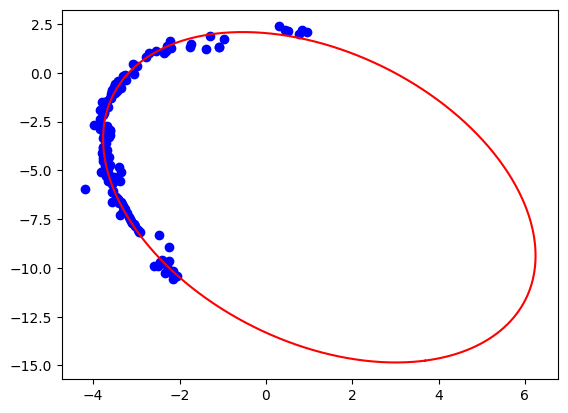

In [ ]:
R = np.arange(0,2*np.pi, 0.01)
M, m, c_x, c_y, phi = fit_ellipse(x,y)
xx = c_x + M*np.cos(R)*np.cos(phi)- m*np.sin(R)*np.sin(phi)
yy = c_y + M*np.cos(R)*np.sin(phi) + m*np.sin(R)*np.cos(phi)
plt.scatter(x,y, color = 'blue')
plt.plot(xx,yy, color = 'red')

In [ ]:
np.max(x), np.min(x)

(np.float64(0.9503539538762034), np.float64(-4.1986257817612564))

In [ ]:
np.max(y), np,min(y)

(np.float64(2.3702089625130855),
 <module 'numpy' from '/usr/local/lib/python3.11/dist-packages/numpy/__init__.py'>,
 np.float64(-10.5610699071975))

In [ ]:
# def hitung_rmse(nilai_prediksi, nilai_aktual):
#     """Menghitung Root Mean Square Error antara dua set data."""
#     nilai_prediksi = np.array(nilai_prediksi)
#     nilai_aktual = np.array(nilai_aktual)

#     # Hitung selisih kuadrat, rata-ratakan, lalu akarkan
#     mse = np.mean((nilai_prediksi - nilai_aktual) ** 2)
#     rmse = np.sqrt(mse)

#     return rmse
# xx_crop = xx[]
# rmse_x = hitung_rmse(xx, x)
# rmse_y = hitung_rmse(yy, y)
# print(f"RMSE pada sumbu X: {rmse_x:.4f}")
# print(f"RMSE pada sumbu Y: {rmse_y:.4f}")
# print(f"RMSE Jarak Total: {rmse_total:.4f}")
y

array([  2.10545182,   1.97661751,   2.19254953,   2.11989984,
         2.16502168,   2.37020896,   1.74467205,   1.90049802,
         1.31578547,   1.31578547,   1.48699004,   1.23483765,
         1.2931196 ,   1.62567981,   1.25170221,   1.38758538,
         1.13841636,   1.11776948,   1.12034742,   1.00707616,
         1.0006475 ,   0.79140676,   0.45758113,   0.33012551,
        -0.17900557,  -0.13628291,  -0.04257907,  -0.17086442,
        -0.3595102 ,  -0.42246192,  -0.61445267,  -0.53360745,
        -0.59165464,  -0.73593735,  -0.90501721,  -0.80762492,
        -0.91714764,  -0.9154599 ,  -0.98272182,  -1.04890626,
        -1.10715065,  -1.27556113,  -1.29109248,  -1.24723435,
        -1.47413915,  -1.51688512,  -1.45593282,  -1.62246841,
        -1.73316744,  -1.73630683,  -1.91360169,  -1.94887796,
        -2.01489721,  -2.08650038,  -2.18723996,  -2.36958168,
        -2.7144846 ,  -2.69395883,  -2.75209264,  -2.90444398,
        -2.93683566,  -2.98766517,  -3.19348372,  -3.16

In [ ]:
import numpy as np

def get_ellipse_coefficients(M, m, cx, cy, phi):
    """
    Menghitung koefisien persamaan elips umum dari parameter geometrisnya.

    Bentuk persamaan target:
    Ax^2 + 2Hxy + By^2 + 2Gx + 2Fy + 1 = 0

    Args:
        M (float): Panjang sumbu semi-mayor (radius terpanjang).
        m (float): Panjang sumbu semi-minor (radius terpendek).
        cx (float): Koordinat x dari pusat elips.
        cy (float): Koordinat y dari pusat elips.
        phi (float): Sudut rotasi elips dalam radian.

    Returns:
        dict: Sebuah dictionary berisi koefisien A, B, H, F, G.
    """
    # Untuk menghindari perhitungan berulang
    cos_phi = np.cos(phi)
    sin_phi = np.sin(phi)
    cos_phi_sq = cos_phi**2
    sin_phi_sq = sin_phi**2

    # Ganti nama variabel agar sesuai dengan rumus turunan
    Rx2 = M**2
    Ry2 = m**2

    # Hitung koefisien perantara (alpha, beta, gamma, zeta)
    alpha = Ry2 * cos_phi_sq + Rx2 * sin_phi_sq
    beta = 2 * (Ry2 - Rx2) * sin_phi * cos_phi
    gamma = Ry2 * sin_phi_sq + Rx2 * cos_phi_sq

    zeta = alpha * cx**2 + beta * cx * cy + gamma * cy**2 - Rx2 * Ry2

    # Hindari pembagian dengan nol untuk kasus elips degenerasi
    if np.isclose(zeta, 0):
        raise ValueError("Elips ini tidak dapat dinormalisasi ke bentuk ... + 1 = 0.")

    # Hitung koefisien akhir dengan normalisasi (dibagi -zeta)
    A = -alpha / zeta
    B = -gamma / zeta
    H = -beta / (2 * zeta)
    G = (alpha * 2 * cx + beta * cy) / (2 * zeta)
    F = (beta * cx + gamma * 2 * cy) / (2 * zeta)

    return {'A': A, 'B': B, 'H': H, 'G': G, 'F': F}

coeffs = get_ellipse_coefficients(M, m, c_x, c_y, phi)

# 3. Tampilkan hasilnya
print("Parameter Elips Awal:")
print(f"  Sumbu Mayor (M): {M}, Sumbu Minor (m): {m}")
print(f"  Pusat (cx, cy): ({c_x}, {c_y})")
print(f"  Sudut (radian): {phi:.4f}\n")

print("Koefisien Persamaan Elips (Ax^2 + 2Hxy + By^2 + 2Gx + 2Fy + 1 = 0):")
for key, value in coeffs.items():
    print(f"  {key}: {value:.4f}")

Parameter Elips Awal:
  Sumbu Mayor (M): 8.721985855939048, Sumbu Minor (m): 4.54781868001781
  Pusat (cx, cy): (1.237999668837771, -6.381124799825007)
  Sudut (radian): -1.2847

Koefisien Persamaan Elips (Ax^2 + 2Hxy + By^2 + 2Gx + 2Fy + 1 = 0):
  A: 0.1056
  B: 0.0370
  H: 0.0221
  G: 0.0103
  F: 0.2086


In [ ]:
A = coeffs['A']
H = coeffs['H']
B = coeffs['B']
G = coeffs['G']
F = coeffs['F']

In [ ]:
Omega2 = np.arctan(2*(H-F*G)/(G**2-F**2+B-A))
Omega = Omega2/2
if Omega < 0:
    Omega += np.pi

Omegad= np.degrees(Omega)
print(f'Omega = {Omegad}')

Omega = 170.19621619085999


In [ ]:
tansqipsq = (2*(H-F*G))/(np.sin(Omega2))
psq = 2/(F**2+G**2+A+B-tansqipsq)
p = np.sqrt(psq)
tani = tansqipsq * psq
i = np.arctan(tani)
if i < 0:
    i+=np.pi
id = np.rad2deg(i)
print(f'i = {id}')

i = 142.0629277525471


In [ ]:
ii = 180 - id

In [ ]:
ii

np.float64(37.9370722474529)

In [ ]:
ii_rad = np.radians(ii)

In [ ]:
tanw = (((F*np.cos(Omega))-(G*np.sin(Omega)))*np.cos(i))/((F*np.sin(Omega))+(G*np.cos(Omega)))
w = np.arctan(tanw)
if w < 0:
    w += 2*np.pi
wd = np.rad2deg(w)
print(f'w = {wd}')

w = 81.17457494301793


In [ ]:
# p
tan2i_p2_2_p2 = F**2 - G**2 - A - B
tan2i_p2 = (F**2 - G**2 + A - B)/np.cos(Omega2)
dua_p2 = tan2i_p2-tan2i_p2_2_p2
p2 = 2/dua_p2
p = np.sqrt(dua_p2)
print(f'p = {p}')

p = 0.4669790030507301


In [ ]:
m

np.float64(4.54781868001781)

In [ ]:
M

np.float64(8.721985855939048)

In [ ]:
e = np.sqrt(1-(m/M)**2)

In [ ]:
4.13/(1-e**2)

np.float64(15.190585917698833)

In [ ]:
e

np.float64(0.8533001149380152)

In [ ]:
a = p/(1-e**2)
a

np.float64(1.7175991931243246)

In [ ]:
Ma = []
for i in range(len(time)):
  Ma.append(mean_anom(ecc_anom(true_anom(np.radians(278.8254), np.radians(theta_corr[i]), Omega, ii), e), e))
Ma = np.array(Ma)

In [ ]:
model = LinearRegression()
model.fit(time_fit, Ma)

LinearRegression()

In [ ]:
time

,time
0,1900.620
1,1900.640
2,1900.710
3,1901.670
4,1902.380
...,...
130,2016.000
131,2016.335
132,2016.667
133,2017.800


In [ ]:
theta_corr

array([ 65.706646  ,  68.80680566,  68.90736447,  76.51502818,
        78.42069614,  82.62141461, 119.26875401, 124.27913195,
       129.28631668, 129.28631668, 139.29318209, 138.40268191,
       143.80994647, 143.91290019, 150.21761018, 148.81816899,
       153.92527389, 154.32639152, 156.2339754 , 156.83445438,
       159.74219793, 164.05026079, 171.56654619, 173.68227276,
       183.09073478, 182.39592375, 180.79728087, 183.00438577,
       186.31196965, 187.01324694, 190.3197132 , 188.82027201,
       189.62122997, 191.82929284, 194.23671706, 193.53823384,
       194.84390179, 194.44462027, 195.44541857, 196.74789331,
       197.18611584, 199.55994769, 199.62026701, 199.160746  ,
       201.5686492 , 201.769687  , 201.57136343, 203.67830867,
       204.68509425, 205.38621188, 206.49124119, 207.29419491,
       208.30034185, 209.10185863, 210.10992149, 211.61734571,
       215.53921923, 214.14169397, 216.74688294, 217.05502564,
       219.06652121, 219.67186984, 220.47242865, 221.17

In [ ]:
Ma

array([ 1.08320859,  1.2601759 ,  1.26639355,  1.83087801,  2.00173533,
       -0.00466875,  0.02211038,  0.02626677,  0.03065312,  0.03065312,
        0.04032287,  0.03940437,  0.04518963,  0.0453049 ,  0.05278451,
        0.05104819,  0.05762221,  0.05816772,  0.06082584,  0.06168522,
        0.0660111 ,  0.07297543,  0.0870617 ,  0.09156263,  0.11532114,
        0.113322  ,  0.10888633,  0.11507027,  0.12520369,  0.12749905,
        0.13909814,  0.13367288,  0.13653534,  0.14485937,  0.15472617,
        0.15177285,  0.15735671,  0.15562015,  0.16002258,  0.16600819,
        0.16809029,  0.18000976,  0.18032745,  0.17792641,  0.19101522,
        0.19216692,  0.1910307 ,  0.20359085,  0.20999459,  0.21461852,
        0.22219475,  0.2279322 ,  0.23541278,  0.24161529,  0.2497391 ,
        0.26260191,  0.30061258,  0.28625496,  0.31381989,  0.31731554,
        0.34148097,  0.34923779,  0.35986409,  0.36953402,  0.37673787,
        0.3855301 ,  0.41543437,  0.42929506,  0.44268515,  0.45

In [ ]:
time_fit

array([[1900.62 ],
       [1900.64 ],
       [1900.71 ],
       [1901.67 ],
       [1902.38 ],
       [1902.47 ],
       [1908.4  ],
       [1909.7  ],
       [1910.6  ],
       [1910.6  ],
       [1911.46 ],
       [1912.65 ],
       [1913.56 ],
       [1913.93 ],
       [1914.52 ],
       [1914.59 ],
       [1915.48 ],
       [1915.62 ],
       [1916.57 ],
       [1916.63 ],
       [1917.6  ],
       [1918.61 ],
       [1920.65 ],
       [1922.62 ],
       [1923.68 ],
       [1924.33 ],
       [1924.5  ],
       [1925.39 ],
       [1926.34 ],
       [1926.5  ],
       [1927.31 ],
       [1927.38 ],
       [1927.5  ],
       [1928.51 ],
       [1929.44 ],
       [1929.63 ],
       [1930.34 ],
       [1930.43 ],
       [1930.53 ],
       [1930.84 ],
       [1931.87 ],
       [1932.35 ],
       [1932.39 ],
       [1932.45 ],
       [1933.44 ],
       [1933.57 ],
       [1933.78 ],
       [1934.65 ],
       [1935.5  ],
       [1935.64 ],
       [1936.27 ],
       [1936.64 ],
       [1937

In [ ]:
slope = model.coef_[0]
slope

np.float64(0.0149743466149834)

In [ ]:
P = 2*np.pi/slope
P

np.float64(419.59662539750497)

In [ ]:
intercept = model.intercept_
-2*np.pi/intercept

np.float64(0.21984026658189765)

In [ ]:
len(time_fit)==len(Ma)

True

In [ ]:
import plotly.express as px

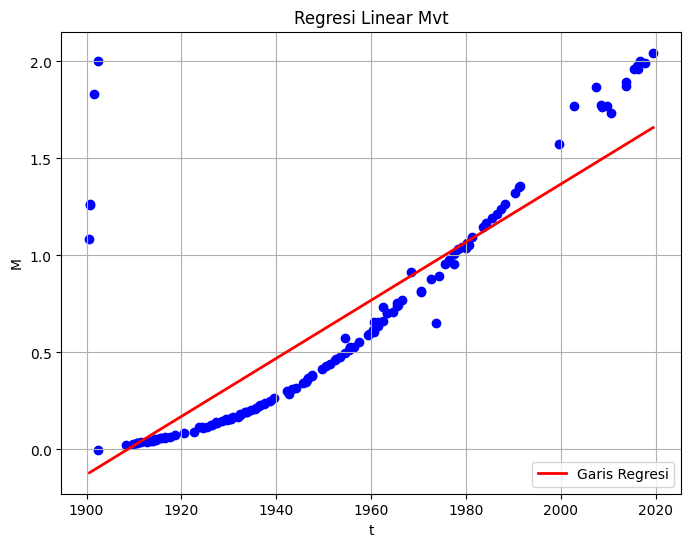

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(time_fit, Ma, color='blue') # Tampilkan data asli (titik-titik)
plt.plot(time_fit, model.predict(time_fit), color='red', linewidth=2, label='Garis Regresi') # Gambar garis hasil regresi

plt.title('Regresi Linear Mvt')
plt.xlabel('t')
plt.ylabel('M')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
fig = px.scatter(x=time, y=Ma, labels={'x': 'Time Fit', 'y': 'Ma'})

# Tampilkan plot
fig.show()

In [ ]:
np.where(time == 1949.64)

(array([66]),)

In [ ]:
Ma_crop = Ma[5:]
time_fit_crop = time_fit[5:]

In [ ]:
model.fit(time_fit_crop, Ma_crop)

LinearRegression()

In [ ]:
slope = model.coef_[0]
slope

np.float64(0.018573023398747036)

In [ ]:
2*np.pi/slope

np.float64(338.2963113912547)

In [ ]:
intercep = model.intercept_
intercep

np.float64(-35.6765397715927)

In [ ]:
T = -intercep/slope
T

np.float64(1920.8794931039333)

In [ ]:
model.score(time_fit_crop, Ma_crop)

0.9555923233601479

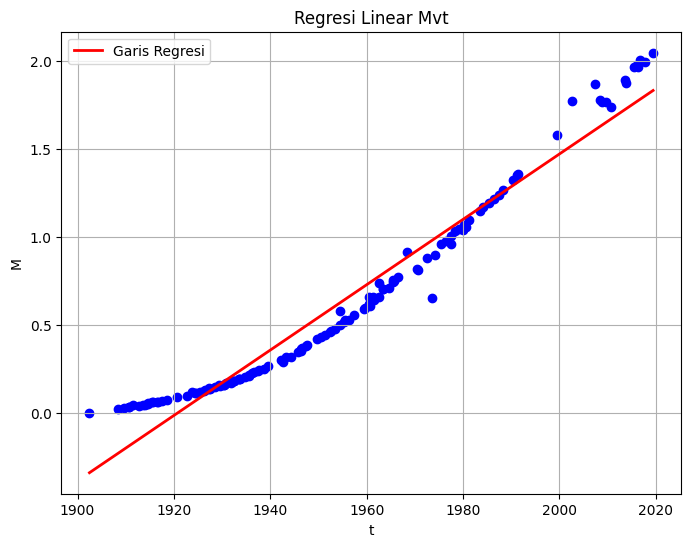

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(time_fit_crop, Ma_crop, color='blue') # Tampilkan data asli (titik-titik)
plt.plot(time_fit_crop, model.predict(time_fit_crop), color='red', linewidth=2, label='Garis Regresi') # Gambar garis hasil regresi

plt.title('Regresi Linear Mvt')
plt.xlabel('t')
plt.ylabel('M')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Ma_cropp = Ma[:66]
time_fit_cropp = time_fit[:66]

In [ ]:
model.fit(time_fit_cropp, Ma_cropp)

LinearRegression()

In [ ]:
slope = model.coef_[0]

In [ ]:
2*np.pi/slope

np.float64(-766.3450821967833)

In [ ]:
inter = model.intercept_
T = inter/slope
T

np.float64(-1958.2281943834696)

In [ ]:
import numpy as np
import plotly.graph_objects as go

def hitung_orbit(a, e, i, omega, Omega_node):
    """
    Menghitung koordinat x, y dari orbit elips yang diproyeksikan di langit.

    Args:
        a (float): Sumbu semi-mayor (dalam detik busur)
        e (float): Eksentrisitas
        i (float): Inklinasi (dalam derajat)
        omega (float): Argumen periastron (dalam derajat)
        Omega_node (float): Longitude nodus ascendens (dalam derajat)

    Returns:
        tuple: (x_coords, y_coords) dari orbit yang diproyeksikan.
    """
    # Konversi sudut dari derajat ke radian
    i_rad = np.radians(i)
    omega_rad = np.radians(omega)
    Omega_rad = np.radians(Omega_node)

    # Buat array anomali sejati (nu) dari 0 hingga 2*pi
    nu = np.linspace(0, 2 * np.pi, 200)

    # Hitung jarak (r) dari bintang primer untuk setiap anomali sejati
    r = a * (1 - e**2) / (1 + e * np.cos(nu))

    # Hitung koordinat (x', y') dalam bidang orbit
    x_prime = r * np.cos(nu)
    y_prime = r * np.sin(nu)

    # Proyeksikan koordinat ke bidang langit
    # Rumus ini mengubah koordinat bidang orbit ke koordinat langit yang teramati
    x = (x_prime * (np.cos(omega_rad) * np.cos(Omega_rad) - np.sin(omega_rad) * np.sin(Omega_rad) * np.cos(i_rad)) -
         y_prime * (np.sin(omega_rad) * np.cos(Omega_rad) + np.cos(omega_rad) * np.sin(Omega_rad) * np.cos(i_rad)))

    y = (x_prime * (np.cos(omega_rad) * np.sin(Omega_rad) + np.sin(omega_rad) * np.cos(Omega_rad) * np.cos(i_rad)) +
         y_prime * (np.sin(omega_rad) * np.sin(Omega_rad) - np.cos(omega_rad) * np.cos(Omega_rad) * np.cos(i_rad)))

    return x, y

# --- Parameter Orbit dari Tabel ---

# 1. Parameter Thiele-Innes
params_ti = {'a': 10.4659, 'e': 0.8227, 'i': 58.4141, 'omega': 292.9161, 'Omega_node': 292.9161}
x_ti, y_ti = hitung_orbit(**params_ti)

# 2. Parameter Kowalsky
params_ko = {'a': 17.1760, 'e': 0.8533, 'i': 37.9341, 'omega': 278.8254, 'Omega_node': 170.1962}
x_ko, y_ko = hitung_orbit(**params_ko)

# 3. Parameter Referensi (Knapp, 2020)
params_kn = {'a': 11.9363, 'e': 0.8087, 'i': 37.1740, 'omega': 332.2560, 'Omega_node': 134.5846}
x_kn, y_kn = hitung_orbit(**params_kn)

# --- Membuat Plot ---

fig = go.Figure()

# Tambahkan trace untuk setiap orbit
fig.add_trace(go.Scatter(x=x_ti, y=y_ti, mode='lines', name='Thiele-Innes', line=dict(width=2)))
fig.add_trace(go.Scatter(x=x_ko, y=y_ko, mode='lines', name='Kowalsky', line=dict(width=2)))
fig.add_trace(go.Scatter(x=x_kn, y=y_kn, mode='lines', name='Referensi (Knapp, 2020)', line=dict(width=3, dash='dash')))
fig.add_trace(go.Scatter(x=x, y=y, name='Titik data'))
# Tambahkan bintang primer di pusat
fig.add_trace(go.Scatter(
    x=[0], y=[0],
    mode='markers',
    marker=dict(size=12, color='yellow', symbol='star'),
    name='Bintang Primer'
))

# Atur layout plot
fig.update_layout(
    title='Visualisasi Orbit Bintang Ganda',
    xaxis_title='Δα (detik busur)',
    yaxis_title='Δδ (detik busur)',
    xaxis=dict(autorange='reversed'), # Membalik sumbu X (Timur di kiri)
    yaxis=dict(scaleanchor="x", scaleratio=1), # Aspek rasio 1:1
    legend_title_text='Set Parameter Orbit',
    template='plotly_dark'
)

fig.show()

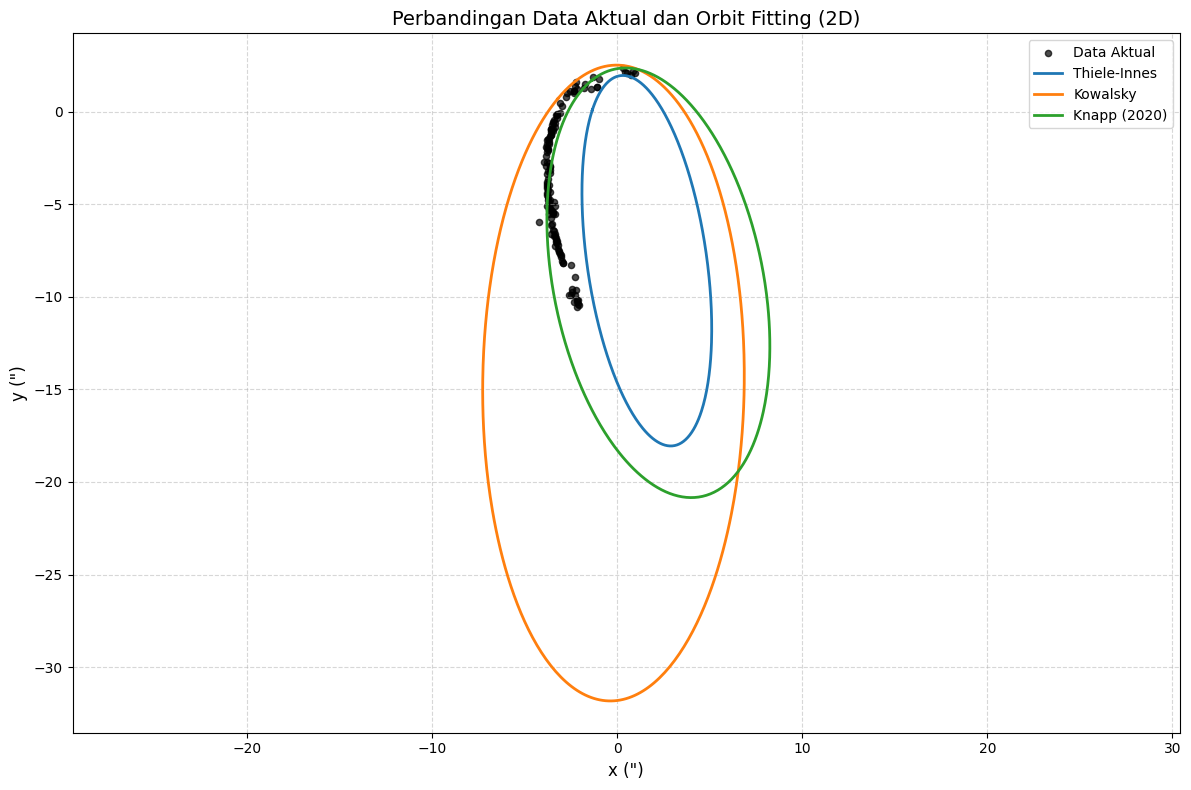

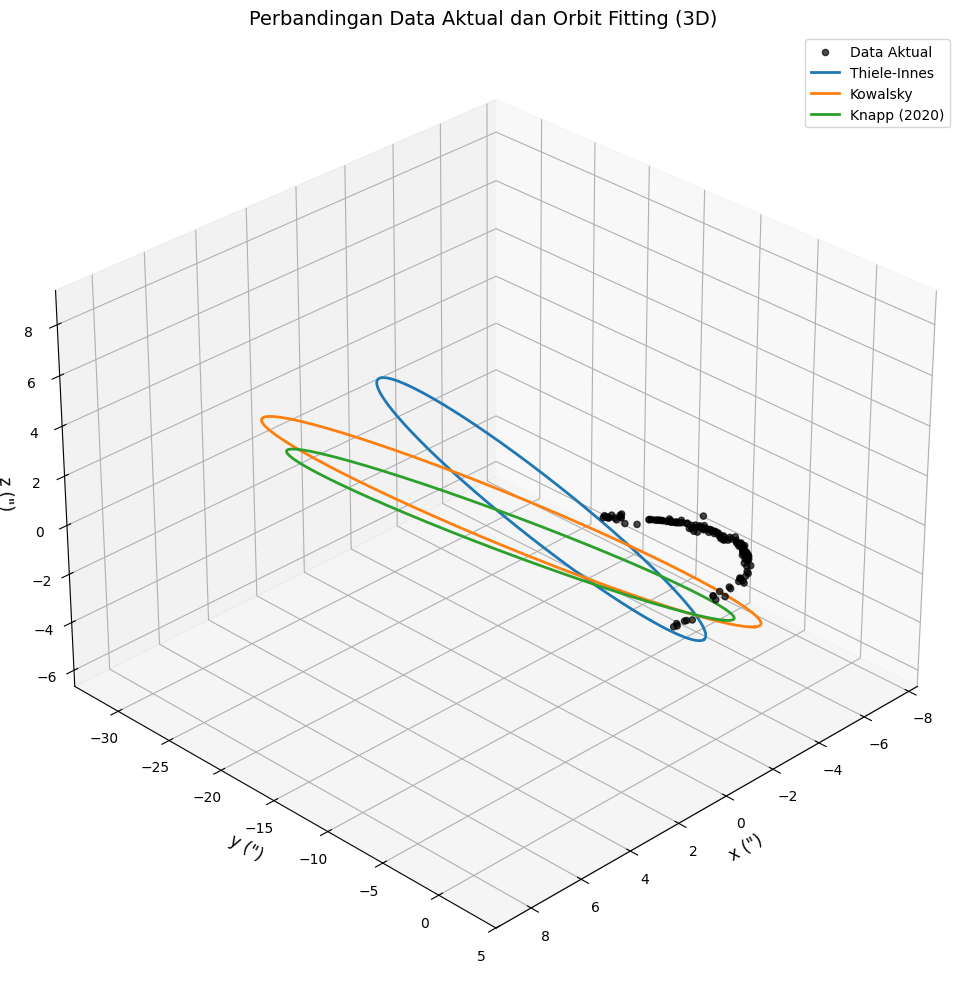

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data aktual
x_data = np.array([0.95035395, 0.76640931, 0.84571069, 0.50835488, 0.44360019,
                   0.30693562, -0.9778136, -1.29541781, -1.07643328, -1.07643328,
                   -1.72836935, -1.39096225, -1.76746759, -2.23041816, -2.18715376,
                   -2.29281635, -2.32639382, -2.32529383, -2.54425267, -2.35359249,
                   -2.71123673, -2.76912898, -3.08626303, -2.98178087, -3.31517074,
                   -3.25715013, -3.05970375, -3.25551921, -3.25017729, -3.4341121,
                   -3.37451447, -3.43884619, -3.49020698, -3.51375813, -3.56697965,
                   -3.35413804, -3.460526, -3.55398835, -3.55673415, -3.48559832,
                   -3.57969642, -3.59013145, -3.62175444, -3.58948554, -3.72921088,
                   -3.79831009, -3.68264302, -3.69989138, -3.77075996, -3.65892588,
                   -3.83956099, -3.77682071, -3.74201673, -3.74841515, -3.7716815,
                   -3.84908855, -3.80006228, -3.97273027, -3.68591727, -3.84663557,
                   -3.61809291, -3.60225719, -3.74273452, -3.62056049, -3.77165708,
                   -3.62523232, -3.71372462, -3.78206128, -3.76943559, -3.78029386,
                   -3.68133477, -3.78898544, -3.74233537, -3.72071785, -3.76475013,
                   -3.62304502, -3.76940887, -3.72485535, -3.61975551, -3.70229712,
                   -3.6681864, -3.68145291, -3.39601684, -3.81108868, -3.70605601,
                   -3.66749918, -3.4601643, -3.6370921, -3.65445858, -3.35721605,
                   -3.52308925, -3.46021446, -3.55389819, -3.4719241, -3.38261104,
                   -3.41523825, -3.53494835, -3.56569266, -3.48296936, -4.19862578,
                   -3.56103341, -3.35431769, -3.34470943, -3.30606561, -3.39539267,
                   -3.2756218, -3.26900582, -3.31610967, -3.26249373, -3.37097641,
                   -3.21057291, -3.16844134, -3.15056627, -3.12018211, -3.09916174,
                   -3.05885047, -3.02392931, -2.97201044, -2.92850609, -2.91816119,
                   -2.47174721, -2.25348749, -2.23394134, -2.4148724, -2.46310046,
                   -2.50357116, -2.58633607, -2.3334622, -2.28159489, -2.16220702,
                   -2.14111915, -2.18063154, -2.1615278, -2.14009962, -2.05113534])

y_data = np.array([2.10545182, 1.97661751, 2.19254953, 2.11989984, 2.16502168,
                   2.37020896, 1.74467205, 1.90049802, 1.31578547, 1.31578547,
                   1.48699004, 1.23483765, 1.2931196, 1.62567981, 1.25170221,
                   1.38758538, 1.13841636, 1.11776948, 1.12034742, 1.00707616,
                   1.0006475, 0.79140676, 0.45758113, 0.33012551, -0.17900557,
                   -0.13628291, -0.04257907, -0.17086442, -0.3595102, -0.42246192,
                   -0.61445267, -0.53360745, -0.59165464, -0.73593735, -0.90501721,
                   -0.80762492, -0.91714764, -0.9154599, -0.98272182, -1.04890626,
                   -1.10715065, -1.27556113, -1.29109248, -1.24723435, -1.47413915,
                   -1.51688512, -1.45593282, -1.62246841, -1.73316744, -1.73630683,
                   -1.91360169, -1.94887796, -2.01489721, -2.08650038, -2.18723996,
                   -2.36958168, -2.7144846, -2.69395883, -2.75209264, -2.90444398,
                   -2.93683566, -2.98766517, -3.19348372, -3.16664518, -3.35813979,
                   -3.29661805, -3.61118394, -3.78539476, -3.87507308, -4.00730075,
                   -3.95066758, -4.1303286, -4.2502347, -4.76680896, -4.38050596,
                   -4.30934389, -4.49721923, -4.62442392, -4.74744879, -4.88066307,
                   -4.93628489, -4.99240558, -4.84906894, -5.09167979, -5.29119541,
                   -5.11752536, -5.43146969, -5.22348409, -5.54387342, -5.09304431,
                   -5.36695837, -5.47880606, -5.71512972, -5.51870846, -5.5270555,
                   -6.46314534, -6.06502598, -6.0933928, -6.36997052, -5.97172852,
                   -6.61204515, -6.61292506, -6.71177472, -6.82991026, -6.69861244,
                   -6.92540416, -6.99260766, -7.05998702, -7.11023654, -7.27715041,
                   -7.18424544, -7.41328695, -7.50339764, -7.58641368, -7.6986101,
                   -7.73730145, -7.8475443, -8.06161385, -8.14768778, -8.16414327,
                   -8.28932842, -8.91974182, -9.64466205, -9.59064603, -9.7125453,
                   -9.87766326, -9.91833483, -10.27845096, -9.89023886, -10.15646447,
                   -10.19360084, -10.25062174, -10.56106991, -10.37252402, -10.44042355])

# Parameter orbit (dari tabel)
params = {
    "Thiele-Innes": {"a": 10.4659, "e": 0.8227, "i": 58.4141, "omega": 292.9161, "Omega": 177.9263},
    "Kowalsky": {"a": 17.1760, "e": 0.8533, "i": 37.9341, "omega": 278.8254, "Omega": 170.1962},
    "Knapp (2020)": {"a": 11.9363, "e": 0.8087, "i": 37.1740, "omega": 332.2560, "Omega": 134.5846}
}

# Fungsi untuk menghitung orbit
def calculate_orbit(a, e, omega, i, Omega, theta):
    r = (a * (1 - e**2)) / (1 + e * np.cos(theta - np.radians(omega)))
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # Rotasi 3D berdasarkan inklinasi (i) dan Omega
    x_rot = x * np.cos(np.radians(Omega)) - y * np.sin(np.radians(Omega))
    y_rot = x * np.sin(np.radians(Omega)) + y * np.cos(np.radians(Omega))
    z_rot = x_rot * np.sin(np.radians(i))
    x_proj = x_rot * np.cos(np.radians(i))

    return x_proj, y_rot, z_rot

# Hitung sudut orbit
theta = np.linspace(0, 2*np.pi, 1000)

# ----------------------------------------
# Plot 2D: Data Aktual vs Orbit Fitting
# ----------------------------------------
plt.figure(figsize=(12, 8))

# Plot data aktual
plt.scatter(x_data, y_data, color='black', label='Data Aktual', s=20, alpha=0.7)

# Plot orbit hasil fitting
for name, param in params.items():
    x_orbit, y_orbit, _ = calculate_orbit(**param, theta=theta)
    plt.plot(x_orbit, y_orbit, label=name, linewidth=2)

plt.xlabel('x (")', fontsize=12)
plt.ylabel('y (")', fontsize=12)
plt.title('Perbandingan Data Aktual dan Orbit Fitting (2D)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.axis('equal')
plt.tight_layout()
plt.show()

# ----------------------------------------
# Plot 3D: Data Aktual vs Orbit Fitting
# ----------------------------------------
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot data aktual (proyeksi 3D dengan z=0)
ax.scatter(x_data, y_data, np.zeros_like(x_data), color='black', label='Data Aktual', s=20, alpha=0.7)

# Plot orbit hasil fitting
for name, param in params.items():
    x_orbit, y_orbit, z_orbit = calculate_orbit(**param, theta=theta)
    ax.plot(x_orbit, y_orbit, z_orbit, label=name, linewidth=2)

ax.set_xlabel('x (")', fontsize=12)
ax.set_ylabel('y (")', fontsize=12)
ax.set_zlabel('z (")', fontsize=12)
ax.set_title('Perbandingan Data Aktual dan Orbit Fitting (3D)', fontsize=14)
ax.legend(fontsize=10)
ax.view_init(elev=30, azim=45)
plt.tight_layout()
plt.show()

In [ ]:
v_orbit_wds = np.linspace(0, 2 * np.pi, 1000)
x_wds, y_wds = [], []

# elements
a_wds, e_wds      = 11.93627, 0.80872
i_deg_wds     = 37.1739
Omega_deg_wds = 134.5845
omega_deg_wds = 332.2559
# satu kali konversi
i_wds   = np.deg2rad(i_deg_wds)
Om_wds  = np.deg2rad(Omega_deg_wds)
om_wds  = np.deg2rad(omega_deg_wds)

for v in v_orbit_wds:
    r_wds = a_wds * (1 - e_wds**2) / (1 + e_wds * np.cos(v))
    X = r_wds*(np.cos(Om_wds)*np.cos(om_wds+v)
          - np.sin(Om_wds)*np.sin(om_wds+v)*np.cos(i_wds) )
    Y = r_wds*( np.sin(Om_wds)*np.cos(om_wds+v)
          + np.cos(Om_wds)*np.sin(om_wds+v)*np.cos(i_wds) )
    # flip sesuai kebutuhan
    x_wds.append(X)
    y_wds.append(Y)

In [ ]:
x_wds, x

([np.float64(-0.8152665091515338),
  np.float64(-0.8271625036552205),
  np.float64(-0.8390408279945278),
  np.float64(-0.8509016411555566),
  np.float64(-0.8627451009480269),
  np.float64(-0.8745713640103182),
  np.float64(-0.8863805858143242),
  np.float64(-0.8981729206701767),
  np.float64(-0.9099485217307853),
  np.float64(-0.9217075409962465),
  np.float64(-0.9334501293180664),
  np.float64(-0.9451764364032501),
  np.float64(-0.9568866108182027),
  np.float64(-0.9685807999925019),
  np.float64(-0.9802591502224761),
  np.float64(-0.9919218066746429),
  np.float64(-1.0035689133889827),
  np.float64(-1.0152006132820284),
  np.float64(-1.0268170481498218),
  np.float64(-1.038418358670672),
  np.float64(-1.050004684407776),
  np.float64(-1.0615761638116445),
  np.float64(-1.0731329342223876),
  np.float64(-1.0846751318718),
  np.float64(-1.0962028918853064),
  np.float64(-1.1077163482837058),
  np.float64(-1.119215633984769),
  np.float64(-1.1307008808046384),
  np.float64(-1.1421722194

In [ ]:
y_wds

[np.float64(2.0336550858700697),
 np.float64(2.031285423074394),
 np.float64(2.028871249931417),
 np.float64(2.026412530299815),
 np.float64(2.0239092250746884),
 np.float64(2.0213612921855213),
 np.float64(2.0187686865937566),
 np.float64(2.016131360289978),
 np.float64(2.013449262290706),
 np.float64(2.0107223386348054),
 np.float64(2.007950532379499),
 np.float64(2.005133783595996),
 np.float64(2.0022720293647267),
 np.float64(1.9993652037701841),
 np.float64(1.9964132378953778),
 np.float64(1.9934160598158914),
 np.float64(1.9903735945935452),
 np.float64(1.9872857642696675),
 np.float64(1.9841524878579646),
 np.float64(1.9809736813370007),
 np.float64(1.9777492576422702),
 np.float64(1.974479126657878),
 np.float64(1.9711631952078144),
 np.float64(1.967801367046829),
 np.float64(1.964393542850898),
 np.float64(1.9609396202072904),
 np.float64(1.9574394936042185),
 np.float64(1.9538930544200892),
 np.float64(1.950300190912335),
 np.float64(1.9466607882058335),
 np.float64(1.9429747

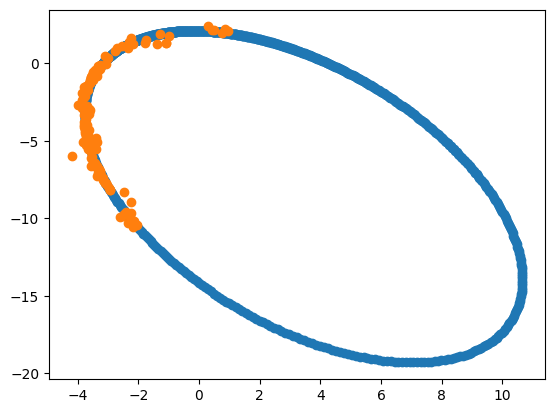

In [ ]:
plt.scatter(x_wds, y_wds)
plt.scatter(x,y)

In [ ]:
x_wds= np.array(x_wds)
y_wds = np.array(y_wds)
fit_ellipse(x_wds,y_wds)

[np.float64(11.52515896916638),
 np.float64(5.7937930967735065),
 np.float64(3.446896336684556),
 np.float64(-8.598167822275396),
 -1.1247094174653562]

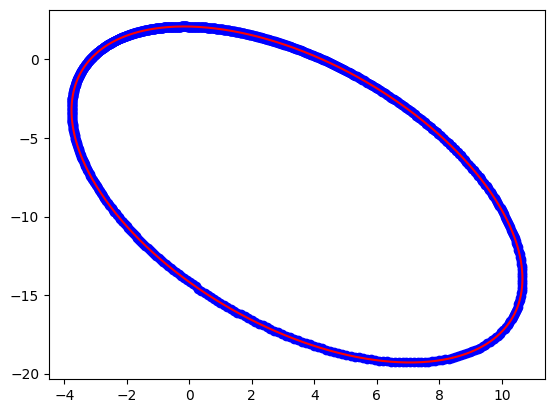

In [ ]:
R = np.arange(0,2*np.pi, 0.01)
M, m, c_x, c_y, phi = fit_ellipse(x_wds,y_wds)
xx = c_x + M*np.cos(R)*np.cos(phi)- m*np.sin(R)*np.sin(phi)
yy = c_y + M*np.cos(R)*np.sin(phi) + m*np.sin(R)*np.cos(phi)
plt.scatter(x_wds,y_wds, color = 'blue')
plt.plot(xx,yy, color = 'red')

In [ ]:
coeffs = get_ellipse_coefficients(M, m, c_x, c_y, phi)

# 3. Tampilkan hasilnya
print("Parameter Elips Awal:")
print(f"  Sumbu Mayor (M): {M}, Sumbu Minor (m): {m}")
print(f"  Pusat (cx, cy): ({c_x}, {c_y})")
print(f"  Sudut (radian): {phi:.4f}\n")

print("Koefisien Persamaan Elips (Ax^2 + 2Hxy + By^2 + 2Gx + 2Fy + 1 = 0):")
for key, value in coeffs.items():
    print(f"  {key}: {value:.4f}")

Parameter Elips Awal:
  Sumbu Mayor (M): 11.52515896916638, Sumbu Minor (m): 5.7937930967735065
  Pusat (cx, cy): (3.446896336684556, -8.598167822275396)
  Sudut (radian): -1.1247

Koefisien Persamaan Elips (Ax^2 + 2Hxy + By^2 + 2Gx + 2Fy + 1 = 0):
  A: 0.0741
  B: 0.0337
  H: 0.0250
  G: -0.0402
  F: 0.2038


In [ ]:
A = coeffs['A']
H = coeffs['H']
B = coeffs['B']
G = coeffs['G']
F = coeffs['F']

In [ ]:
Omega2 = np.arctan(2*(H-F*G)/(G**2-F**2+B-A))
Omega = Omega2/2
if Omega < 0:
    Omega += np.pi

Omegad= np.degrees(Omega)
print(f'Omega = {Omegad}')

Omega = 160.19211646436284


In [ ]:
tansqipsq = (2*(H-F*G))/(np.sin(Omega2))
psq = 2/(F**2+G**2+A+B-tansqipsq)
p = np.sqrt(psq)
tani = tansqipsq * psq
i = np.arctan(tani)
if i < 0:
    i+=np.pi
id = np.rad2deg(i)
print(f'i = {id}')

i = 140.75909897614557


In [ ]:
ii = 180 - id
ii

np.float64(39.240901023854434)

In [ ]:
ii_rad= np.radians(ii)

In [ ]:
tanw = (((F*np.cos(Omega))-(G*np.sin(Omega)))*np.cos(i))/((F*np.sin(Omega))+(G*np.cos(Omega)))
w = np.arctan(tanw)
if w < 0:
    w += 2*np.pi
wd = np.rad2deg(w)
print(f'w = {wd}')

w = 52.23649457724699


In [ ]:
# p
tan2i_p2_2_p2 = F**2 - G**2 - A - B
tan2i_p2 = (F**2 - G**2 + A - B)/np.cos(Omega2)
dua_p2 = tan2i_p2-tan2i_p2_2_p2
p2 = 2/dua_p2
p = np.sqrt(dua_p2)
print(f'p = {p}')

p = 0.41496426134856607


In [ ]:
e = np.sqrt(1-(m/M)**2)
e

np.float64(0.8644561081998232)

In [ ]:
Ma = []
for i in range(len(time)):
  Ma.append(mean_anom(ecc_anom(true_anom(np.radians(278.8254), np.radians(theta_corr[i]), Omega, ii), e), e))
Ma = np.array(Ma)